# Graph Processing

In [26]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
from tensorflow.python.summary.summary_iterator import summary_iterator

2023-09-22 05:44:26.213297: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-22 05:44:26.230752: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-22 05:44:26.231038: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: initialization failed

In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)


TensorBoard version:  2.14.0


In [7]:
happo_df = pd.read_json("/home/allenwu/Desktop/work/MARLlib-1.0.3/exp_results/happo_mlp_CityLearn_5e-07_0.0005_APPEND-DATA_seed-10/HAPPOTrainer_CityLearnGym_CityLearn_62b71_00000_0_2023-09-19_03-07-48/result.json", lines=True)

hatrpo_df = pd.read_json("/home/allenwu/Desktop/work/MARLlib-1.0.3/exp_results/hatrpo_mlp_CityLearn/HATRPOTrainer_CityLearnGym_CityLearn_21172_00000_0_2023-09-19_00-57-07/result.json", lines=True)

mappo_df = pd.read_json("/home/allenwu/Desktop/work/MARLlib-1.0.3/exp_results/mappo_mlp_CityLearn/MAPPOTrainer_CityLearnGym_CityLearn_ce90e_00000_0_2023-09-18_23-50-23/result.json", lines=True)

matrpo_df = pd.read_json("/home/allenwu/Desktop/work/MARLlib-1.0.3/exp_results/matrpo_mlp_CityLearn/MATRPOTrainer_CityLearnGym_CityLearn_3e44b_00000_0_2023-09-19_00-14-59/result.json", lines=True)

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,timesteps_this_iter,agent_timesteps_total,done,...,info/learner/policy_0/learner_stats/grad_gnorm,info/learner/policy_0/learner_stats/cur_kl_coeff,info/learner/policy_0/learner_stats/cur_lr,info/learner/policy_0/learner_stats/total_loss,info/learner/policy_0/learner_stats/policy_loss,info/learner/policy_0/learner_stats/vf_loss,info/learner/policy_0/learner_stats/vf_explained_var,info/learner/policy_0/learner_stats/kl,info/learner/policy_0/learner_stats/entropy,info/learner/policy_0/learner_stats/entropy_coeff
0,NaN,NaN,NaN,NaN,0,2,10,0,20,False,...,59.963040,2.000000e-01,0.00005,34.813213,8.940697e-08,34.827400,-0.002249,2.842171e-15,1.419005,0.01
1,NaN,NaN,NaN,NaN,0,2,20,0,40,False,...,20.051300,1.000000e-01,0.00005,6.514060,3.278255e-07,6.528273,-0.001487,0.000000e+00,1.421368,0.01
2,NaN,NaN,NaN,NaN,0,2,30,0,60,False,...,12.563358,5.000000e-02,0.00005,1.516041,4.172325e-07,1.530222,-0.002805,1.421085e-15,1.418086,0.01
3,NaN,NaN,NaN,NaN,0,2,40,0,80,False,...,108.387410,2.500000e-02,0.00005,89.782639,-2.086163e-07,89.796738,0.000835,0.000000e+00,1.410454,0.01
4,NaN,NaN,NaN,NaN,0,2,50,0,100,False,...,102.252550,1.250000e-02,0.00005,103.518814,8.456409e-07,103.532997,0.000138,0.000000e+00,1.418591,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,NaN,NaN,NaN,NaN,0,2,8720,0,17440,False,...,37.785230,1.270293e-263,0.00005,2.098988,2.682209e-06,2.148661,0.018410,3.410605e-14,4.967343,0.01
872,NaN,NaN,NaN,NaN,0,2,8730,0,17460,False,...,124.189760,6.351463e-264,0.00005,16.938747,1.460314e-06,16.985302,0.003793,1.136868e-13,4.655303,0.01
873,NaN,NaN,NaN,NaN,0,2,8740,0,17480,False,...,56.033092,3.175732e-264,0.00005,26.935368,-3.874302e-07,26.983353,-0.000998,2.273737e-14,4.798759,0.01
874,NaN,NaN,NaN,NaN,0,2,8750,0,17500,False,...,66.329544,1.587866e-264,0.00005,13.776686,-5.960464e-08,13.826268,-0.002022,5.115908e-14,4.958399,0.01


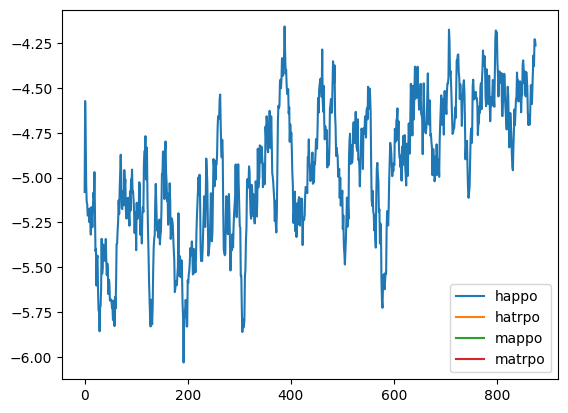

In [21]:
plt.plot(happo_df.index, happo_df['episode_reward_mean'], label= "happo")
plt.plot(hatrpo_df.index, hatrpo_df['episode_reward_mean'], label = "hatrpo")
plt.plot(mappo_df.index, mappo_df['episode_reward_mean'], label = "mappo")
plt.plot(matrpo_df.index, matrpo_df['episode_reward_mean'], label = "matrpo")
plt.legend()


In [23]:
hatrpo_df['episode_reward_mean']

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episode_media,episodes_this_iter,policy_reward_min,policy_reward_max,policy_reward_mean,custom_metrics,...,time_total_s,pid,hostname,node_ip,config,time_since_restore,timesteps_since_restore,iterations_since_restore,perf,evaluation
0,NaN,NaN,NaN,NaN,{},0,{},{},{},{},...,0.048367,12104,allenwu-super-ubuntu,192.168.50.163,"{'num_workers': 2, 'num_envs_per_worker': 1, '...",0.048367,0,1,"{'cpu_util_percent': 5.8, 'ram_util_percent': ...",NaN
1,NaN,NaN,NaN,NaN,{},0,{},{},{},{},...,0.093893,12104,allenwu-super-ubuntu,192.168.50.163,"{'num_workers': 2, 'num_envs_per_worker': 1, '...",0.093893,0,2,{},NaN
2,NaN,NaN,NaN,NaN,{},0,{},{},{},{},...,0.139205,12104,allenwu-super-ubuntu,192.168.50.163,"{'num_workers': 2, 'num_envs_per_worker': 1, '...",0.139205,0,3,{},NaN
3,NaN,NaN,NaN,NaN,{},0,{},{},{},{},...,0.184880,12104,allenwu-super-ubuntu,192.168.50.163,"{'num_workers': 2, 'num_envs_per_worker': 1, '...",0.184880,0,4,{},NaN
4,NaN,NaN,NaN,NaN,{},0,{},{},{},{},...,0.230661,12104,allenwu-super-ubuntu,192.168.50.163,"{'num_workers': 2, 'num_envs_per_worker': 1, '...",0.230661,0,5,{},NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,NaN,NaN,NaN,NaN,{},0,{},{},{},{},...,1886.644529,12104,allenwu-super-ubuntu,192.168.50.163,"{'num_workers': 2, 'num_envs_per_worker': 1, '...",1886.644529,0,872,{},NaN
872,NaN,NaN,NaN,NaN,{},0,{},{},{},{},...,1886.691194,12104,allenwu-super-ubuntu,192.168.50.163,"{'num_workers': 2, 'num_envs_per_worker': 1, '...",1886.691194,0,873,{},NaN
873,NaN,NaN,NaN,NaN,{},0,{},{},{},{},...,1886.738011,12104,allenwu-super-ubuntu,192.168.50.163,"{'num_workers': 2, 'num_envs_per_worker': 1, '...",1886.738011,0,874,{},NaN
874,NaN,NaN,NaN,NaN,{},0,{},{},{},{},...,1886.785809,12104,allenwu-super-ubuntu,192.168.50.163,"{'num_workers': 2, 'num_envs_per_worker': 1, '...",1886.785809,0,875,{},NaN
